#### MNIST((Modified National Institute of Standards and Technology)

In [ ]:
 we will be using the MNIST dataset, which is a set of 70,000 small
images of digits handwritten by high school students and employees of the US Cen‐
sus Bureau. Each image is labeled with the digit it represents. This set has been stud‐
ied so much that it is often called the “Hello World” of Machine Learning: whenever
people come up with a new classification algorithm, they are curious to see how it
will perform on MNIST. Whenever someone learns Machine Learning, sooner or
later they tackle MNIST.
Scikit-Learn provides many helper functions to download popular datasets. MNIST is
one of them. The following code fetches the MNIST dataset
* By default Scikit-Learn caches downloaded datasets in a directory called $HOME/scikit_learn_data

In [1]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot fig
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

Datasets loaded by Scikit-Learn generally have a similar dictionary structure including:
* A DESCR key describing the dataset
* A **data** key containing an array with one row per instance and one column per feature
* A **target** key containing an array with the labels

Let’s look at these arrays:


In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape


(70000,)

In [6]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [9]:
y[0]

'5'

There are **70,000** images, and each image has **784 features**. This is because each image
is **28×28**(784) pixels, and each feature simply represents **one pixel’s intensity**, from 0
(white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to
do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using
Matplotlib’s imshow() function

Saving figure some_digit_plot


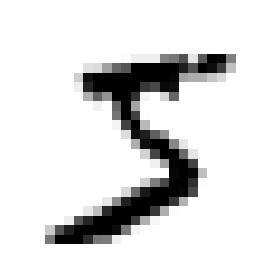

In [10]:

import matplotlib.pyplot as plt

some_digit = X[0]
#print("some_digit ",some_digit)
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

This looks like a 5, and indeed that’s what the label tells us

In [11]:
y[0]
#int(y[0])

'5'

In [12]:
# Note that the label is a string. We prefer numbers, so let’s cast y to integers:
y = y.astype(np.uint8)

In [13]:
y[0]

5

In [14]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,interpolation="nearest")
    plt.axis("off")

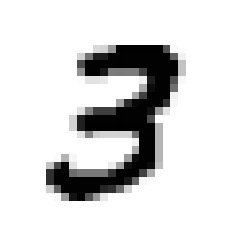

In [15]:
plot_digit(X[7])

In [16]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
     # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


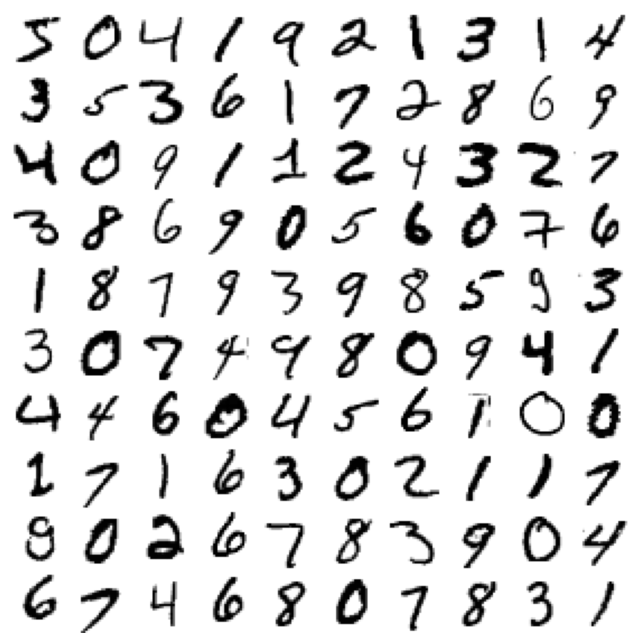

In [17]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

But wait! You should always create a test set and set it aside before inspecting the data
closely. The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images):

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


The training set is already shuffled for us, which is good as this guarantees that all
cross-validation folds will be similar (you don’t want one fold to be missing some dig‐
its)

#### Training a Binary Classifier


Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for
this classification task

In [19]:
y_train_5 = (y_train == 5) # y_train_5 = True/False
y_test_5 = (y_test == 5)

In [20]:
y_train_5
print(y_train_5)
print(y_test_5)
print(len(y_train_5))
print(len(y_test_5))

[ True False False ...  True False False]
[False False False ... False  True False]
60000
10000


In [21]:
y_train_5
#print(type(y_train_5))
c = 0 
k = 0
for i in y_train_5:
    k += 1
    if(i==1):
        c += 1
print(c,k)
    

5421 60000


Okay, now let’s pick a classifier and train it. A good place to start is with a **Stochastic
Gradient Descent (SGD) classifier**, using Scikit-Learn’s SGDClassifier class. This clas‐
sifier has the advantage of being capable of handling **very large datasets efficiently**.
This is in part because SGD deals with training instances independently, one at a time
(which also makes SGD **well suited for online learning**), as we will see later. Let’s create
an SGDClassifier and train it on the whole training set

In [22]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier( random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [23]:
some_digit #some_digit = X[0] first data -> was 5

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [24]:
sgd_clf.predict([some_digit])


array([ True])

The classifier guesses that this image represents a 5 (True). Looks like it guessed right
in this particular case! Now, let’s evaluate this model’s performance.

#### Measuring Accuracy Using Cross-Validation

Occasionally you will need more control over the cross-validation process than what
Scikit-Learn provides off-the-shelf. In these cases, you can implement crossvalidation yourself; it is actually fairly straightforward. The following code does
roughly the same thing as Scikit-Learn’s cross_val_score() function, and prints the 
same result

In [25]:
print(y_train_5)
print(len(y_train_5))


[ True False False ...  True False False]
60000


In [26]:
X_train
print(len(X_train))

60000


In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    print( "X_train_folds: ",len(X_train_folds))
    y_train_folds = y_train_5[train_index]
    print( "y_train_folds: ",len(y_train_folds))

    X_test_fold = X_train[test_index]
    print( "X_test_folds: ",len(X_test_fold))

    y_test_fold = y_train_5[test_index]
    print( "y_test_fold: ",len(y_test_fold))


    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    print("y_pred: ",y_pred)
    n_correct = sum(y_pred == y_test_fold)
    print("n_correct: ",n_correct)
    print("len(y_pred): ",len(y_pred))
    print("ratio: ", n_correct / len(y_pred))

X_train_folds:  40000
y_train_folds:  40000
X_test_folds:  20000
y_test_fold:  20000
y_pred:  [ True False False ... False  True False]
n_correct:  19338
len(y_pred):  20000
ratio:  0.9669
X_train_folds:  40000
y_train_folds:  40000
X_test_folds:  20000
y_test_fold:  20000
y_pred:  [False False  True ... False False False]
n_correct:  18325
len(y_pred):  20000
ratio:  0.91625
X_train_folds:  40000
y_train_folds:  40000
X_test_folds:  20000
y_test_fold:  20000
y_pred:  [False False False ... False False False]
n_correct:  19357
len(y_pred):  20000
ratio:  0.96785


K-fold crossvalidation means splitting the training set into K-folds (in this case, three)

Let’s use the cross_val_score() function to evaluate your SGDClassifier model
using K-fold cross-validation, with three folds. Remember that K-fold crossvalidation means splitting the training set into K-folds (in this case, three), then mak‐
ing predictions and evaluating them on each fold using a model trained on the
remaining folds

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

Wow! Above 95% accuracy (ratio of correct predictions) on all cross-validation folds? 
This looks amazing, doesn’t it? Well, before you get too excited, let’s look at a very
dumb classifier that just classifies every single image in the “not-5” class

In [29]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

Can you guess this model’s accuracy? Let’s find out:


In [30]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the
images are 5s(0-9 each image is 10% of total images approx), so if you always guess that an image is not a 5, you will be right about
90% of the time.

This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some
classes are much more frequent than others)

#### Confusion Matrix
A much better way to evaluate the performance of a classifier is to look at the confu‐
sion matrix. The general idea is to count the number of times instances of class A are
classified as class B. For example, to know the number of times the classifier confused
images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion
matrix


To compute the confusion matrix, you first need to have a set of predictions, so they
can be compared to the actual targets. You could make predictions on the test set, but
let’s keep it untouched for now (remember that you want to use the test set only at the
very end of your project, once you have a classifier that you are ready to launch).
Instead, you can use the cross_val_predict() function

In [31]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [32]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

Just like the cross_val_score() function, cross_val_predict() performs K-fold
cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each
instance in the training set (“clean” meaning that the prediction is made by a model
that never saw the data during training

Now you are ready to get the confusion matrix using the confusion_matrix() func‐
tion. Just pass it the target classes (y_train_5) and the predicted classes
(y_train_pred)

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [34]:
cm = confusion_matrix(y_train_5, y_train_pred)

Each row in a confusion matrix represents an actual class, while each column repre‐
sents a predicted class. The first row of this matrix considers non-5 images (the nega‐
tive class): 53892 of them were correctly classified as non-5s (they are called true
negatives), while the remaining 687 were wrongly classified as 5s (false positives).
The second row considers the images of 5s (the positive class): 1891 were wrongly
classified as non-5s (false negatives), while the remaining 3530 were correctly classi‐
fied as 5s (true positives). **A perfect classifier would have only true positives and true
negatives, so its confusion matrix would have nonzero values only on its main diago‐
nal (top left to bottom right)**:


In [35]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]], dtype=int64)

The confusion matrix gives you a lot of information, but sometimes you may prefer a
more concise metric. An interesting one to look at is the accuracy of the positive pre‐
dictions; this is called the precision of the classifier 

* precision = TP/(TP + FP)
* TP is the number of true positives, and FP is the number of false positives.

* A trivial way to have perfect precision is to make one single positive prediction and
ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the
classifier would ignore all but one positive instance. So precision is typically used
along with another metric named recall, also called sensitivity or true positive rate

> TPR : this is the ratio of positive instances that are correctly detected by the classifier
> * recall = TP/(TP + FN)

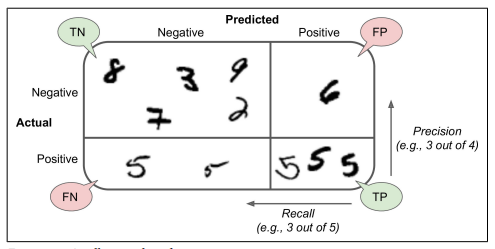

### Precision and Recall


Scikit-Learn provides several functions to compute classifier metrics, including preci‐
sion and recall

In [36]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 4096 / (4096 + 1522)



0.8370879772350012

In [37]:
#without   precision_score() function
cm[1, 1] / (cm[0, 1] + cm[1, 1])


0.8370879772350012

In [38]:
 recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325)

0.6511713705958311

In [39]:
#without   recall_score() function

cm[1, 1] / (cm[1, 0] + cm[1, 1])


0.6511713705958311

Now your 5-detector does not look as shiny as it did when you looked at its accuracy.
When it claims an image represents a 5, it is correct only 83.7% of the time. More‐
over, it only detects 65.1% of the 5s.

It is often convenient to combine precision and recall into a single metric called the F1
score, in particular if you need a simple way to compare two classifiers. The F1
 score is  the harmonic mean of precision and recall Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values.
As a result, the classifier will only get a high F1 score if both recall and precision are high.

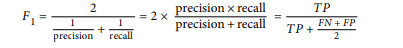

In [40]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [41]:
# without f1_score function
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)


0.7325171197343847

> The F1 score favors classifiers that have similar precision and recall. This is not always
what you want: in some contexts you mostly care about precision, and in other con‐
texts you really care about recall. For example, if you trained a classifier to detect vid‐
eos that are safe for kids, you would probably prefer a classifier that rejects many
good videos (low recall) but keeps only safe ones (high precision), rather than a clas‐
sifier that has a much higher recall but lets a few really bad videos show up in your
product .
**(to understand this in above binary classifier repalce 5s with good videos & non 5s with bad video and made confusion matrix)**
> 
> On the other hand, suppose you train a classifier to detect
shoplifters on surveillance images: it is probably fine if your classifier has only 30%
precision as long as it has 99% recall (sure, the security guards will get a few false
alerts, but almost all shoplifters will get caught).
Unfortunately, you can’t have it both ways: increasing precision reduces recall, and
vice versa. This is called the precision/recall tradeoff.


To understand this tradeoff, let’s look at how the SGDClassifier makes its classifica‐
tion decisions. For each instance, it computes a score based on a decision function, 
and if that score is greater than a threshold, it assigns the instance to the positive
class, or else it assigns it to the negative class.
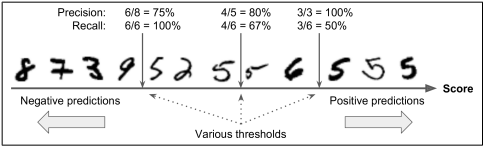

>s. Figure shows a few digits positioned from the lowest score on the left to the highest score on the right. Suppose the decision threshold is positioned at the central arrow (between the two 5s): you will find 4 true positives (actual 5s) on the right of that threshold, and one false positive (actually a 6). Therefore, with that threshold, the precision is 80% (4 out of 5). But out of 6 actual 5s, the classifier only detects 4, so the recall is 67% (4 out of 6). Now if you raise the threshold (move it to the arrow on the right), the false positive (the 6) becomes a true negative, thereby increasing precision (up to 100% in this case), but one true positive becomes a false negative, decreasing recall down to 50%(3/6). Conversely, lowering the threshold increases recall and reduces precision.

Scikit-Learn does not let you set the threshold directly, but it does give you access to
the decision scores that it uses to make predictions. **Instead of** calling the classifier’s
**predict()** method, you **can call** its **decision_function()** method, which returns a
score for each instance, and then make predictions based on those scores using any
threshold you want

In [42]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [43]:
sgd_clf.predict([some_digit])


array([ True])

In [44]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [45]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

The SGDClassifier uses a threshold equal to 0, so the previous code returns the same
result as the predict() method (i.e., True). Let’s raise the threshold:

In [46]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually repre‐
sents a 5, and the classifier detects it when the threshold is 0, but it misses it when the
threshold is increased to 8,000.

Now how do you decide which threshold to use? For this you will first need to get the scores of all instances in the training set using the **cross_val_predict()** function again, but this time specifying that you want it to return **decision scores** instead of predictions

In [47]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
print(y_scores)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


Now with these scores you can compute precision and recall for all possible thresh‐
olds using the **precision_recall_curve()** function

In [48]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [49]:
print("precisions ",precisions)
print("len of precisions ",len(precisions))

precisions  [0.09040123 0.09038606 0.09038757 ... 1.         1.         1.        ]
len of precisions  59967


In [50]:
print("recalls ",recalls)
print("len of recalls  ",len(recalls))

recalls  [1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
len of recalls   59967


In [51]:
print("thresholds ",thresholds)
print("len of thresholds ",len(thresholds))

thresholds  [-106527.45300471 -105763.22240074 -105406.2965229  ...   38871.26391927
   42216.05562787   49441.43765905]
len of thresholds  59966


Finally, you can plot precision and recall as functions of the threshold value using
Matplotlib

In [52]:
x = [2,5,6,8,9,-10,11]
x[:-1]

[2, 5, 6, 8, 9, -10]

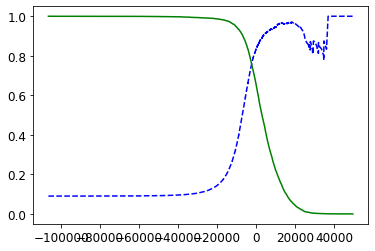

In [53]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 # highlight the threshold, add the legend, axis label and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Saving figure precision_recall_vs_threshold_plot


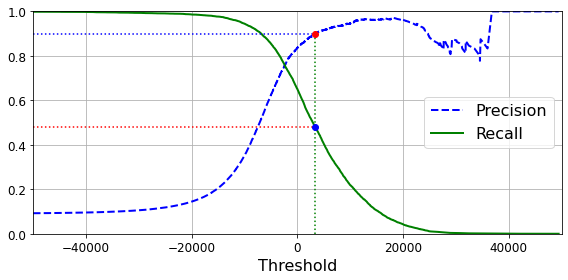

In [54]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             


recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "g:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "b:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "bo")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

You may wonder why the precision curve is bumpier than the recall
curve in this Figure. The reason is that precision may sometimes go
down when you raise the threshold (although in general it will go
up). To understand why, look back at above Figure and notice what
happens when you start from the central threshold and move it just
one digit to the right: precision goes from 4/5 (80%) down to 3/4
(75%){3/4 when we shift 1 position right}. On the other hand, recall can only go down when the thres‐
hold is increased, which explains why its curve looks smooth.

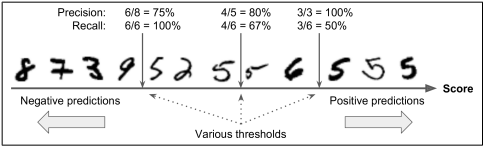

Another way to select a good precision/recall tradeoff is to plot precision directly
against recall, as shown in Figure 

Saving figure precision_vs_recall_plot


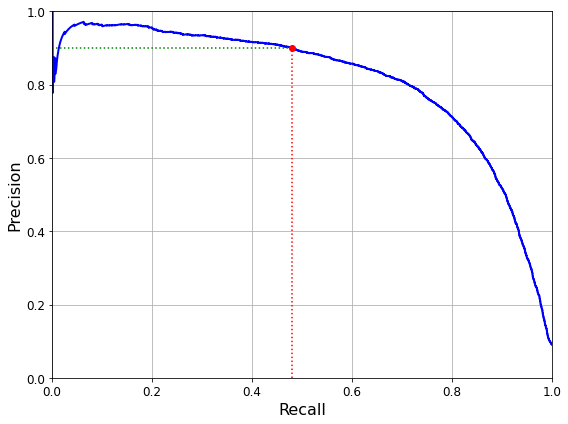

In [55]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "g:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

You can see that precision really starts to fall sharply around 80% recall. You will
probably want to select a precision/recall tradeoff just before that drop—for example,
at around 60% recall. But of course the choice depends on your project.
So let’s suppose you decide to aim for 90% precision. You look up the first plot and
find that you need to use a threshold of about 3400. To be more precise you can
search for the lowest threshold that gives you at least 90% precision (np.argmax()
will give us the first index of the maximum value, which in this case means the first
True value)

In [56]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] #3370
print("threshold_90_precision ",threshold_90_precision)

threshold_90_precision  3370.0194991439557


To make predictions (on the training set for now), instead of calling the classifier’s
predict() method, you can just run this code

In [57]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

Let’s check these predictions’ precision and recall

In [58]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [59]:
recall_score(y_train_5, y_train_pred_90)


0.4799852425751706

 you have a 90% precision classifier ! As you can see, it is fairly easy to create a
classifier with virtually any precision you want: just set a high enough threshold, and
you’re done. Hmm, not so fast. A high-precision classifier is not very useful if its 
recall is too low!

**If someone says “let’s reach 99% precision,” you should ask, “at
what recall?”**

### The ROC Curve


The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, **the ROC curve plots the true positive rate (another name for recall) against the false positive rate** . The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate,  which is the ratio of negative instances that are correctly classified as negative. **The TNR is also called specificity**. Hence the ROC curve plots **sensitivity (recall)** versus **specificity**.


To plot the ROC curve, 
>you first need to compute the TPR and FPR for various thres‐
hold values, using the **roc_curve()** function:
    

In [60]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [61]:
print(fpr, tpr, thresholds)

[0.         0.         0.         ... 0.99937705 0.99937705 1.        ] [0.00000000e+00 1.84467810e-04 9.22339052e-04 ... 9.99815532e-01
 1.00000000e+00 1.00000000e+00] [  49442.43765905   49441.43765905   36801.60697028 ... -105763.22240074
 -106527.45300471 -146348.56726174]


Saving figure roc_curve_plot


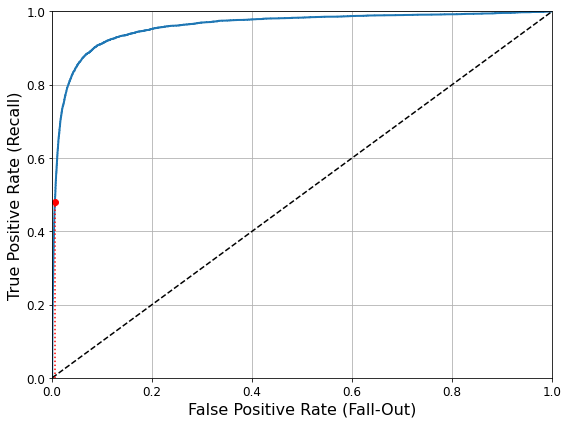

In [62]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "g:")  
plt.plot([fpr_90], [recall_90_precision], "ro")               
save_fig("roc_curve_plot")                                    
plt.show()

Once again there is a tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

One way to compare classifiers is to measure the area under the curve (AUC). A per‐
fect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC
AUC

In [63]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

>Since the ROC curve is so similar to the precision/recall (or PR) curve, you may wonder how to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and the ROC curve otherwise. For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the topright corner).

Let’s **train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the **SGDClassifier**. First, you need to get scores for each instance in the
training set. But due to the way it works, the RandomForestClassi fier class does not have a decision_function() method. Instead it has a pre
dict_proba() method. Scikit-Learn classifiers generally have one or the other. The predict_proba() method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the
given class (e.g., 70% chance that the image represents a 5):

In [64]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

But to plot a ROC curve, you need scores, not probabilities. A simple solution is to
use the positive class’s probability as the score:

In [65]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Now you are ready to plot the ROC curve. It is useful to plot the first ROC curve as
well to see how they compare 

Saving figure roc_curve_comparison_plot


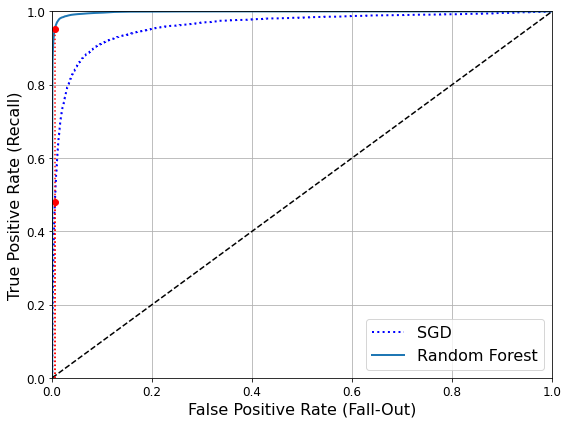

In [66]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

the RandomForestClassifier’s ROC curve looks much better than the SGDClassifier’s: it comes much closer to the top-left corner. As a
result, its ROC AUC score is also significantly better:

In [67]:
roc_auc_score(y_train_5, y_scores_forest)


0.9983436731328145

measuring the precision and recall scores: you should find 99.0% precision and
86.6% recall. Not too bad!

In [68]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [69]:
recall_score(y_train_5, y_train_pred_forest)


0.8662608374838591

Hopefully we now know 
>* how to train binary classifiers
>* choose the appropriate metric for your task
>* evaluate your classifiers using cross-validation, select the precision/recall tradeoff that fits your needs, 
>* compare various models using ROC curves and ROC AUC scores. 

Now let’s try to detect more than just the 5s.


### Multiclass Classifcation

* Whereas binary classifiers distinguish between two classes,**multiclass classifiers (also
called multinomial classifiers) can distinguish between more than two classes**

* Some algorithms capable of handling multiple classes directly:  (such as **Random Forest classifiers or naive Bayes classifiers**) 
* strictly binary classifiers(such as **Support Vector Machine classifiers or Linear classifiers**).

#### How to use binary classifier for multiclass classifier
*  **1)** one way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a  1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called the **one-versus-all (OvA)** strategy  (also called **one-versus-the-rest**).
>
* **2)** Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the **one-versus-one (OvO)** strategy. 
If there are N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST problem,(10*9/2 = 45) binary classifiers! 

> * When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels. 
> * The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish istead of all.

Some algorithms **(such as Support Vector Machine classifiers) scale poorly with the size of the training set**, so for these algorithms **OvO is preferred since it is faster to train many classifiers on small training sets than training few classifiers on large training sets**. For most binary classification algorithms, however, OvA is preferred.

Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers for which it uses OvO). Let’s try this with the SGDClassifier

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

sgd_clf = SGDClassifier( random_state=42)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

some_digit = X[0]              #first data -> was 5
sgd_clf.fit(X_train, y_train)   # y_train, not y_train_5
sgd_clf.predict([some_digit])

some_digit_scores = sgd_clf.decision_function([some_digit])
print("some_digit_scores: ",some_digit_scores)

print("np.argmax(some_digit_scores): ",np.argmax(some_digit_scores))
print("sgd_clf.classes_: ", sgd_clf.classes_)
print("sgd_clf.classes_[3]: ", sgd_clf.classes_[3])


In [73]:
sgd_clf.fit(X_train, y_train)   # y_train, not y_train_5
sgd_clf.predict([some_digit])
print("prediction",sgd_clf.predict([some_digit]))
some_digit_scores = sgd_clf.decision_function([some_digit])
print("some_digit_scores: ",some_digit_scores)

print("np.argmax(some_digit_scores): ",np.argmax(some_digit_scores))
print("sgd_clf.classes_: ", sgd_clf.classes_)
print("sgd_clf.classes_[5 ]: ", sgd_clf.classes_[5])


prediction [3]
some_digit_scores:  [[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]
np.argmax(some_digit_scores):  3
sgd_clf.classes_:  [0 1 2 3 4 5 6 7 8 9]
sgd_clf.classes_[5 ]:  5


* Under the hood, Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the image, and selected the class with the highest score.
* you can call the decision_function() method Instead of returning just one score per instance, it now returns 10 scores, one per class.

svm classifier use **OvO** so there took some data like here 1000 data set


In [71]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [72]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

If you **want to force ScikitLearn to use one-versus-one or one-versus-all**, you can use the **OneVsOneClassifier** or **OneVsRestClassifier** classes. Simply create an instance and pass a binary classifier to its constructor.

In [78]:
# OneVsOneClassifier using SGD
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])
print("prediction:",ovo_clf.predict([some_digit]))
print(ovo_clf.decision_function([some_digit]))
print("Total class: ",len(ovo_clf.estimators_))

prediction: [5]
[[2.66666696 3.66666714 5.33333258 8.33333319 0.6666669  9.33333315
  0.66666684 2.66666841 5.33333214 6.33333275]]
Total class:  45


In [76]:
# OneVsReSTClassifier using SGD

from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SGDClassifier(random_state=42))
ovr_clf.fit(X_train, y_train)


OneVsRestClassifier(estimator=SGDClassifier(random_state=42))

In [77]:
print(ovr_clf.decision_function([some_digit]))    # to get score
print(ovr_clf.predict([some_digit]))
print("Total class: ",len(ovr_clf.estimators_))

[[-13781.33922923 -24334.62190222 -11148.68966068  -3664.79262749
  -20719.95525531   2164.22030239 -31446.3628772  -15088.01473606
  -12954.44836362 -10802.51962293]]
[5]
Total class:  10


In [83]:
# OneVsReSTClassifier using SVM

from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
print(ovr_clf.predict([some_digit]))
print(ovr_clf.decision_function([some_digit])) 
print("Total class: ",len(ovr_clf.estimators_))

[5]
[[-0.9990256  -0.99963766 -0.99949709 -0.99902667 -0.99986906  0.10132159
  -0.99976287 -0.99933311 -0.99943631 -0.99924045]]
Total class:  10


####  Training a RandomForestClassifier is just as easy
* This time Scikit-Learn did not have to run OvA or OvO because Random Forest
classifiers can directly classify instances into multiple classes. You can call **predict_proba()** to get the list of probabilities that the classifier assigned to each instance for each class.

In [80]:
forest_clf.fit(X_train, y_train)
print("prediction: ", forest_clf.predict([some_digit]))
print(" forest_clf.predict_proba([some_digit]: ", forest_clf.predict_proba([some_digit])) # to get prob


prediction:  [5]
 forest_clf.predict_proba([some_digit]:  [[0.   0.   0.01 0.08 0.   0.9  0.   0.   0.   0.01]]


* array means that the model estimates a 90% probability that the image represents a 5

### Evaluate these classifiers**
As usual, you want to use crossvalidation. Let’s evaluate the SGDClassifier’s accuracy using the cross_val_score() function:

In [81]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

It gets over 84% on all test folds. If you used a random classifier, you would get 10% accuracy, so this is not such a bad score, but you can still do much better. For example, simply scaling the inputs increases accuracy above
89%:

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [84]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9646 , 0.96255, 0.9666 ])

In [ ]:
cross_val_score(svm_clf, X_train, y_train, cv=3, scoring="accuracy")

## Error Analysis

Of course, if this were a real project, you would follow the steps in your Machine
Learning project checklist:
* exploring data preparation options
* trying out multiple models
* shortlisting the best ones and fine-tuning their hyperparameters
* using GridSearchCV, and automating as much as possibleHere


First, you can look at the confusion matrix. 
You need to make predictions using the **cross_val_predict() function, then call  the confusion_matrix()** function, just like earlier

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)


In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

That’s a lot of numbers. It’s often more convenient to look at an image representation of the confusion matrix, using Matplotlib’s matshow() function

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()


#### From above figure :
* This confusion matrix looks fairly good, since most images are on the main diagonal,which means that they were classified correctly. 
* The 5s look slightly darker than theother digits, which could mean that there are fewer images of 5s in the dataset or that
the classifier does not perform as well on 5s as on other digits. 


#### Let’s focus the plot on the errors
* divide each value in the confusion matrix by the number of images in the corresponding class, so you can compare error


In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
print("row_sums : ", row_sums)
norm_conf_mx = conf_mx / row_sums


In [ ]:
print("norm_conf_mx : ", norm_conf_mx)

Now let’s fill the diagonal with zeros to keep only the errors, and let’s plot the result:

In [ ]:
np.fill_diagonal(norm_conf_mx, 0) # you can see diagonal become black
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


* rows represent actual classes, while columns represent predicted classes. 
* The column for class 8 is quite bright, which tells you that many images get misclassified as 8s.
* However, the row for class 8 is not that bad, telling you that actual 8s in general get properly classified as 8s. 
* As you can see, the confusion matrix is not necessarily symmetrical. 
* You can also see that 3s and 5s often get confused

* Analyzing the confusion matrix can often give you insights on ways to improve your classifier. Looking at this plot, it seems that your efforts should be spent on reducing  the false 8s.
* For example, you could try to gather more training data for digits that look like 8s (but are not) so the classifier can learn to distinguish them from real 8s.
* Or you could engineer new features that would help the classifier—for example, writing an algorithm to count the number of closed loops (e.g., 8 has two, 6 has one, 5 hasnone).
* Or you could preprocess the images (e.g., using Scikit-Image, Pillow, orOpenCV) to make some patterns stand out more, such as closed loops.

###### Analyzing individual errors can also be a good way to gain insights on what your classifier is doing and why it is failing, but it is more difficult and time-consuming.

For example, let’s plot examples of 3s and 5s (the plot_digits() function)

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
print("X_aa : ",X_aa)

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] #train and prediction both are 3
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]# train data is 3 but predicted 5
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]# train data is 5 but predicted 3
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)] #train and prediction both are 
plt.figure(figsize=(8,8))
plt.subplot(221);plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

* The two 5×5 blocks on the left show digits classified as 3s, and the two 5×5 blocks on the right show images classified as 5s.
* . Some of the digits that the classifier gets wrong (i.e., in the bottom-left and top-right blocks) are so badly written that even a human would have trouble classifying them (e.g.,in  bottom left block  the 5 on the 1st row and 2nd column truly looks like a badly written 3)
* SGDClassifier, which is a linear model. All it does is assign a weight per class to each pixel, and when it sees a new image it just sums up the weighted pixel intensities to get a score for each class. So since 3s and 5s differ only by a few pixels, this model will easily confuse them.

The main difference between 3s and 5s is the position of the small line that joins the
top line to the bottom arc. 

### Multilabel Classification

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

import numpy as np

mnist=fetch_openml('mnist_784',version=1, as_frame=False)
X,y=mnist['data'],mnist['target']
ovo_clf=OneVsRestClassifier(SGDClassifier(random_state=42))
X_train,X_test,y_train,y_test= X[:60000],X[60000:],y[:60000],y[60000:]
some_digit=X[0]
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])
print("Prediction: ",ovo_clf.predict([some_digit]))
print(ovo_clf.decision_function([some_digit]))
print(np.argmax(ovo_clf.decision_function([some_digit])))
print("Total class: ",len(ovo_clf.estimators_))

Prediction:  ['5']
[[-13781.33922923 -24334.62190222 -11148.68966068  -3664.79262749
  -20719.95525531   2164.22030239 -31446.3628772  -15088.01473606
  -12954.44836362 -10802.51962293]]
5
Total class:  10


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

import numpy as np

mnist=fetch_openml('mnist_784',version=1, as_frame=False)
X,y=mnist['data'],mnist['target']
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
X_train,X_test,y_train,y_test= X[:60000],X[60000:],y[:60000],y[60000:]
some_digit=X[0]
ovo_clf.fit(X_train,y_train)
print(ovo_clf.decision_function([some_digit]))
print(np.argmax(ovo_clf.decision_function([some_digit])))
print("Total class: ",len(ovo_clf.estimators_))

[[2.66666696 3.66666714 5.33333258 8.33333319 0.6666669  9.33333315
  0.66666684 2.66666841 5.33333214 6.33333275]]
5
Total class:  45


In [9]:
from sklearn.datasets import fetch_openml
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

mnist=fetch_openml('mnist_784',version=1, as_frame=False)
X,y=mnist['data'],mnist['target']
ovo_clf=OneVsOneClassifier(RandomForestClassifier(n_estimators=100,random_state=42))
X_train,X_test,y_train,y_test= X[:60000],X[60000:],y[:60000],y[60000:]
some_digit=X[0]
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])
print("Prediction: ",ovo_clf.predict([some_digit]))
print("Prediction: ",ovo_clf.predict([some_digit]))
print(ovo_clf.decision_function([some_digit]))
print(np.argmax(ovo_clf.decision_function([some_digit])))
print("Total class: ",len(ovo_clf.estimators_))

Prediction:  ['5']
Prediction:  ['5']
[[ 1.7112896   2.72167217  5.76798379  8.20512821 -0.24538259  9.27654742
   0.91729323  4.2         7.27250608  5.27261688]]
5
Total class:  45


In [3]:
from sklearn.datasets import fetch_openml
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

mnist=fetch_openml('mnist_784',version=1, as_frame=False)
X,y=mnist['data'],mnist['target']
ovo_clf=OneVsRestClassifier(RandomForestClassifier(n_estimators=100,random_state=42))
X_train,X_test,y_train,y_test= X[:60000],X[60000:],y[:60000],y[60000:]
some_digit=X[0]
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])
print("Prediction: ",ovo_clf.predict([some_digit]))
print("Prediction: ",ovo_clf.predict([some_digit]))
print(ovo_clf.decision_function([some_digit]))
print(np.argmax(ovo_clf.decision_function([some_digit])))
print("Total class: ",len(ovo_clf.estimators_))

Prediction:  ['5']
Prediction:  ['5']


AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeRegressor

import numpy as np

mnist=fetch_openml('mnist_784',version=1, as_frame=False)
X,y=mnist['data'],mnist['target']
ovo_clf=OneVsOneClassifier(DecisionTreeRegressor(random_state=42))
X_train,X_test,y_train,y_test= X[:60000],X[60000:],y[:60000],y[60000:]
some_digit=X[0]
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

print("Prediction: ",ovo_clf.predict([some_digit]))

print(ovo_clf.decision_function([some_digit]))
print(np.argmax(ovo_clf.decision_function([some_digit])))
print("Total class: ",len(ovo_clf.estimators_))

Prediction:  ['5']
Prediction:  ['5']
[[1.70833333 2.72222222 2.73333333 8.22222222 2.77777778 9.27777778
  0.77777778 3.16666667 6.27777778 7.29166667]]
5
Total class:  45


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVR

import numpy as np

mnist=fetch_openml('mnist_784',version=1, as_frame=False)
X,y=mnist['data'],mnist['target']
ovo_clf=OneVsOneClassifier(SVR(kernel="linear"))
X_train,X_test,y_train,y_test= X[:60000],X[60000:],y[:60000],y[60000:]
some_digit=X[0]
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])
print("Prediction: ",ovo_clf.predict([some_digit]))
print("Prediction: ",ovo_clf.predict([some_digit]))
print(ovo_clf.decision_function([some_digit]))
print(np.argmax(ovo_clf.decision_function([some_digit])))
print("Total class: ",len(ovo_clf.estimators_))